# **합성곱 신경망**

In [3]:
#ttung102802@gmail.com
from google.colab import drive
from IPython.display import Image
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


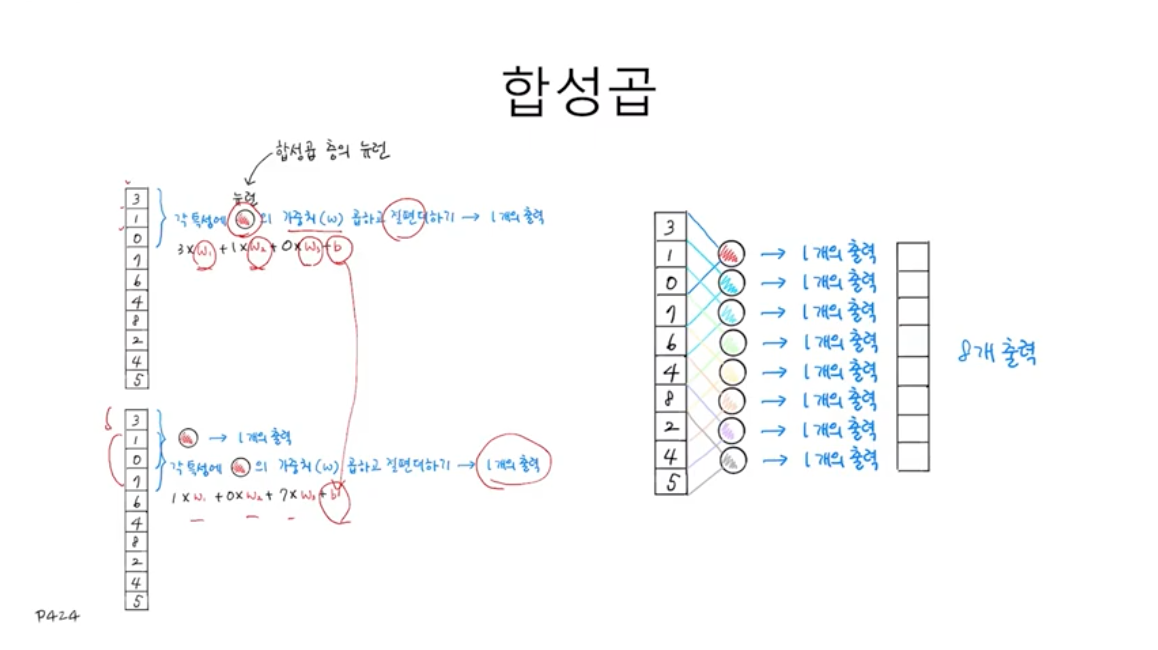

In [4]:
Image('/gdrive/My Drive/Colab Notebooks/ML_Learning17_합성곱신경망_images/01.png')

여기서 각 뉴런에 곱해지는 가중치를 합성곱 신경망에선  필터, 또는 커널이라고하며, 이 커널이
그림에서 보이는것처럼 밑으로 이동하며 각 뉴런을 곱해 가중치를 학습한다.

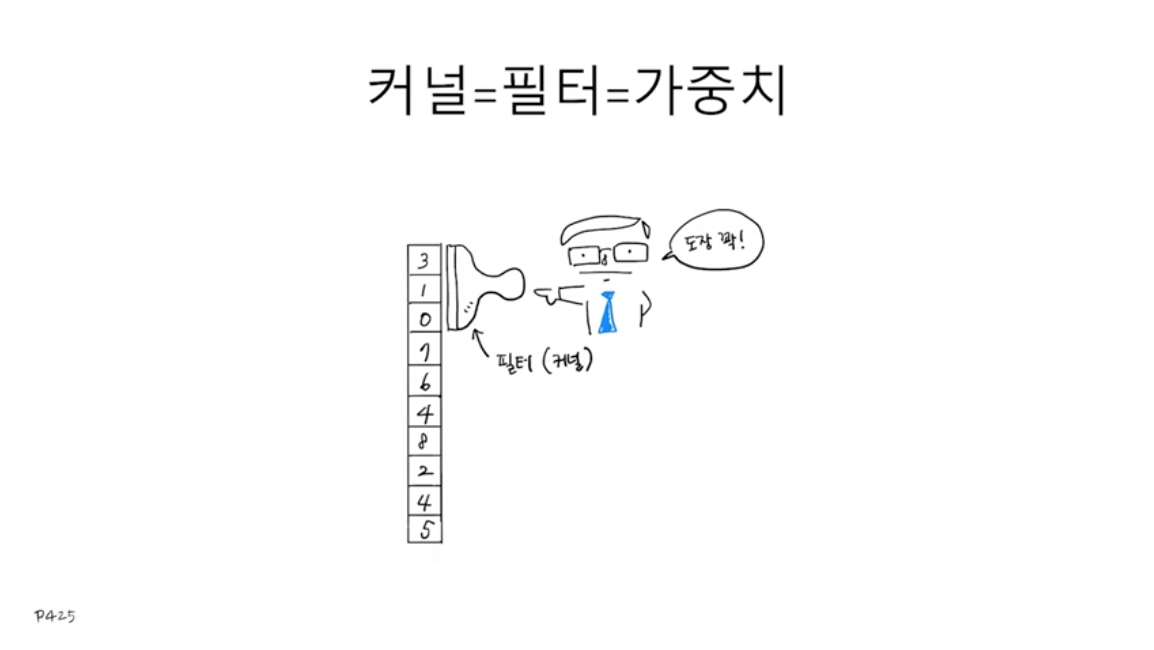

In [6]:
Image('/gdrive/My Drive/Colab Notebooks/ML_Learning17_합성곱신경망_images/02.png')

2차원 합성곱의 경우 2차원 커널을 사용하며, 왼쪽에서 오른쪽으로, 위에서 아래로 움직이며 연산을 한다.

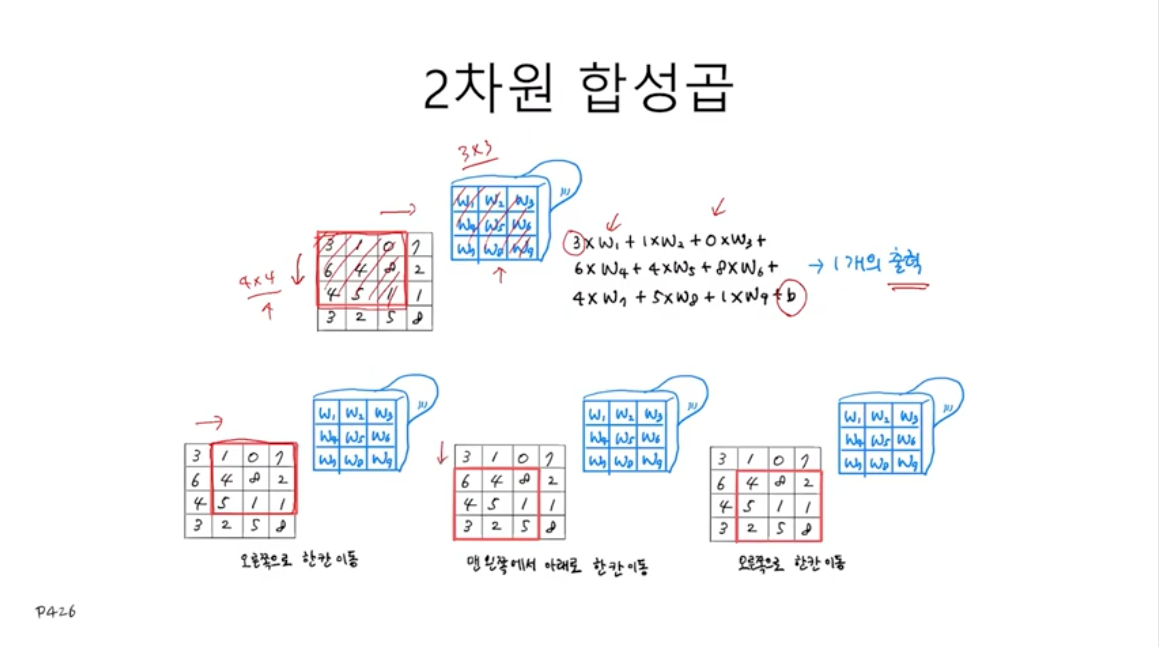

In [8]:
Image('/gdrive/My Drive/Colab Notebooks/ML_Learning17_합성곱신경망_images/03.png')

아래와 같이 4X4배열을 3X3커널로 합성곱 연산을 시행하면 결과로 2X2의 이차원 배열이 나오는데 이를 **특성맵**(특징맵)이라고 한다. 또한 커널에서 활성화함수를 사용하기때문에(주로 relu함수) 특성맵 또한 활성화 출력이다. 

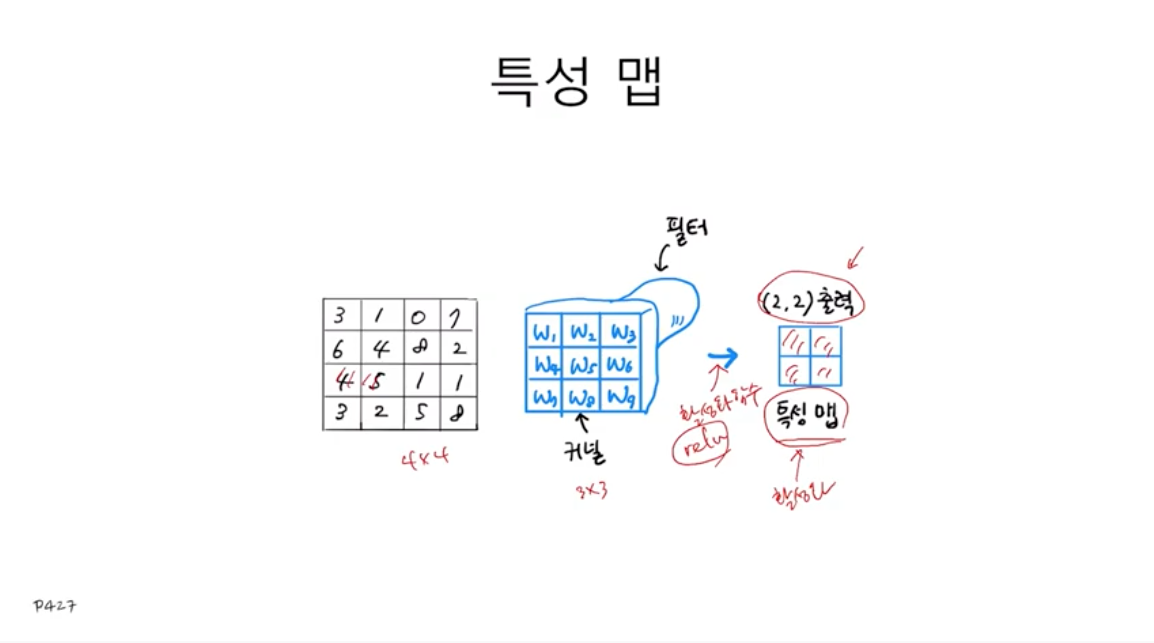

In [11]:
Image('/gdrive/My Drive/Colab Notebooks/ML_Learning17_합성곱신경망_images/04.png')

합성곱 신경망에서는 이러한 커널을 여러개 사용하며 커널마다 각각의 가중치와 절편을 가지고있다.
아래의 그림의 경우 4X4배열을 3X3커널 3개를 사용하여 합성곱 연산을 시행했으며, 각각의 필터가 하나의 2X2특성맵을 출력하므로 결과값은 2X2X3의 3차원 특성맵으로 반환된다.

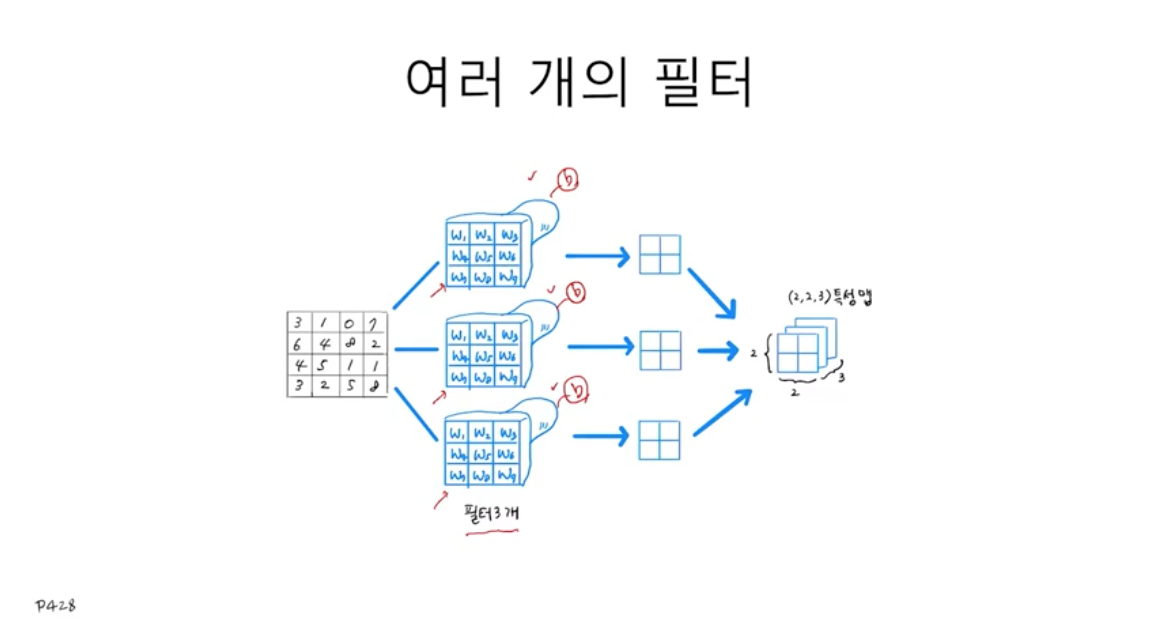

In [13]:
Image('/gdrive/My Drive/Colab Notebooks/ML_Learning17_합성곱신경망_images/05.png')

합성곱 인공신경망에서는 커널의 이동을 늘려주기위해 주어진 배열 겉에 아래와 같이 한 픽셀을 덧붙이는 **패딩**이라는 기법을 사용한다.

아래 예시는 겉에 0을 덧붙이는 '제로패딩'을 사용했으며, 원본배열과 특성맵의 크기를 같게하는 '세임패딩'또한 사용하였다.

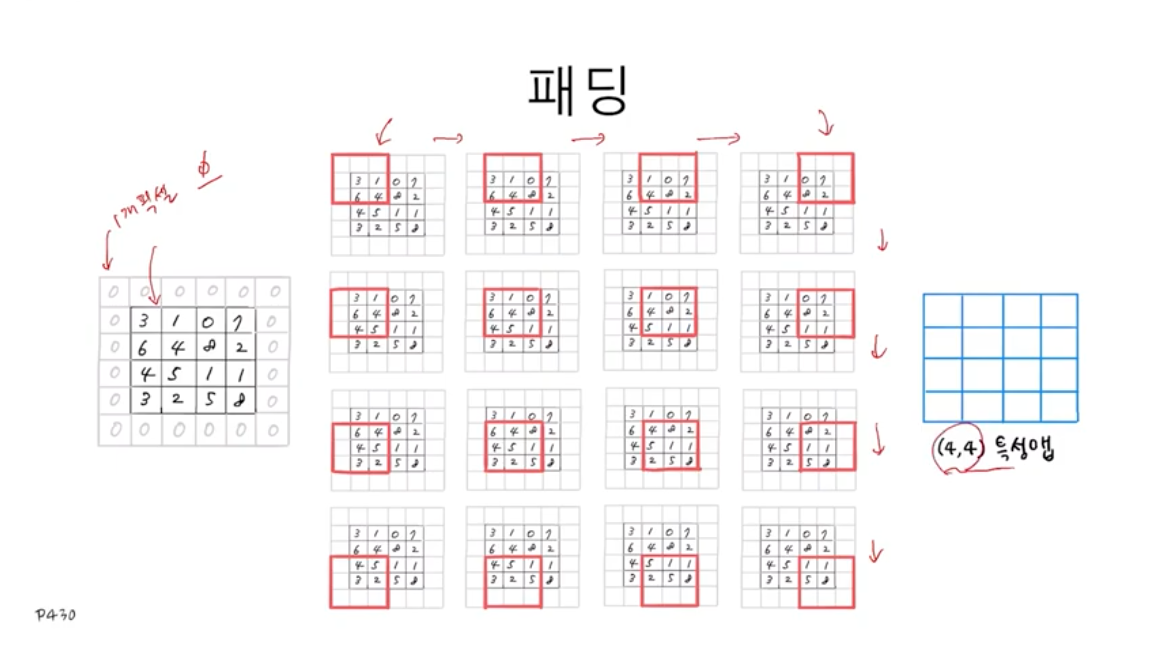

In [19]:
Image('/gdrive/My Drive/Colab Notebooks/ML_Learning17_합성곱신경망_images/06.png')

왼쪽 첫번째, 패딩을 하지않았을 경우 주변픽셀(3,7,3,8)의 경우 커널의 연산에 한번밖에 참여하지 않은데 비해, 중간픽셀(4,8,5,1)은 커널의 연산에 4번이나 참여하여 주변픽셀과 4배정도 차이가 난다.

하지만 왼쪽 두번째, 패딩을 했을경우 주변픽셀과 중간픽셀의 참여도가 2배정도로 줄여준다.

따라서, 패딩의 목적은 **주변픽셀을 더 찾기 쉽도록 데이터를 정제하는것**이다.

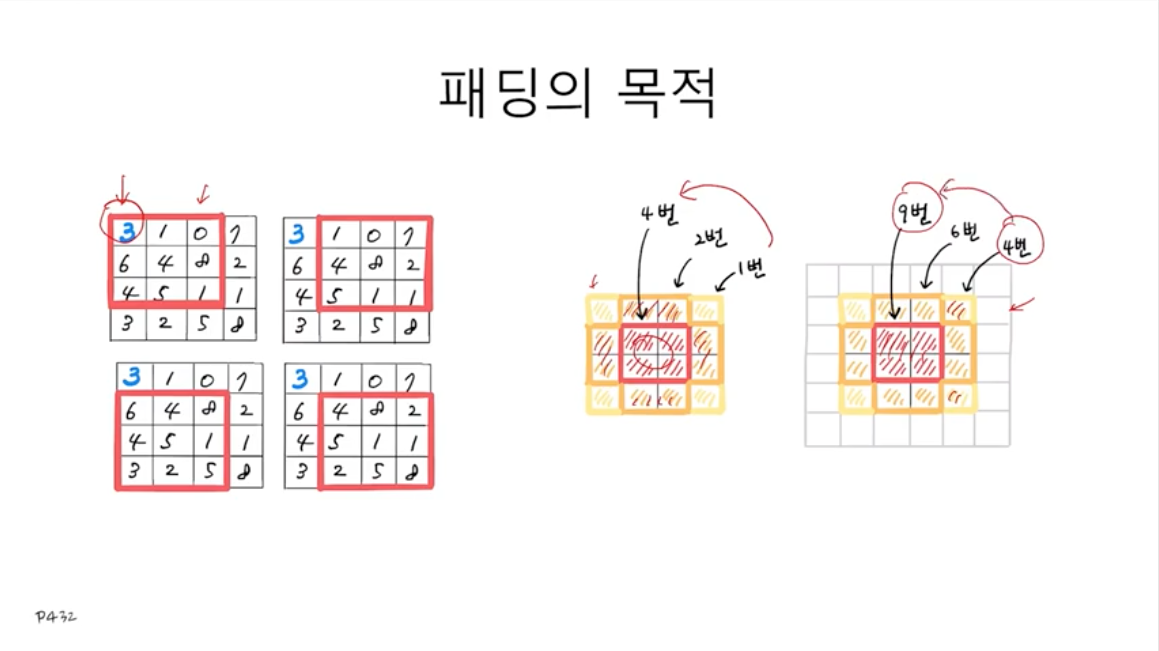

In [20]:
Image('/gdrive/My Drive/Colab Notebooks/ML_Learning17_합성곱신경망_images/07.png')

커널이 1보다 큰 칸수를 슬라이드 하도록 하는 것을 **스트라이드**라고 하며, 그림과 같이 슬라이드 할 수 없는 경우 남은 칸을 생략하고 다음으로 넘어간다. 따라서 스트라이드를 할 경우 보기와 같이 입력 배열보다 특성맵의 크기가 작아진다.

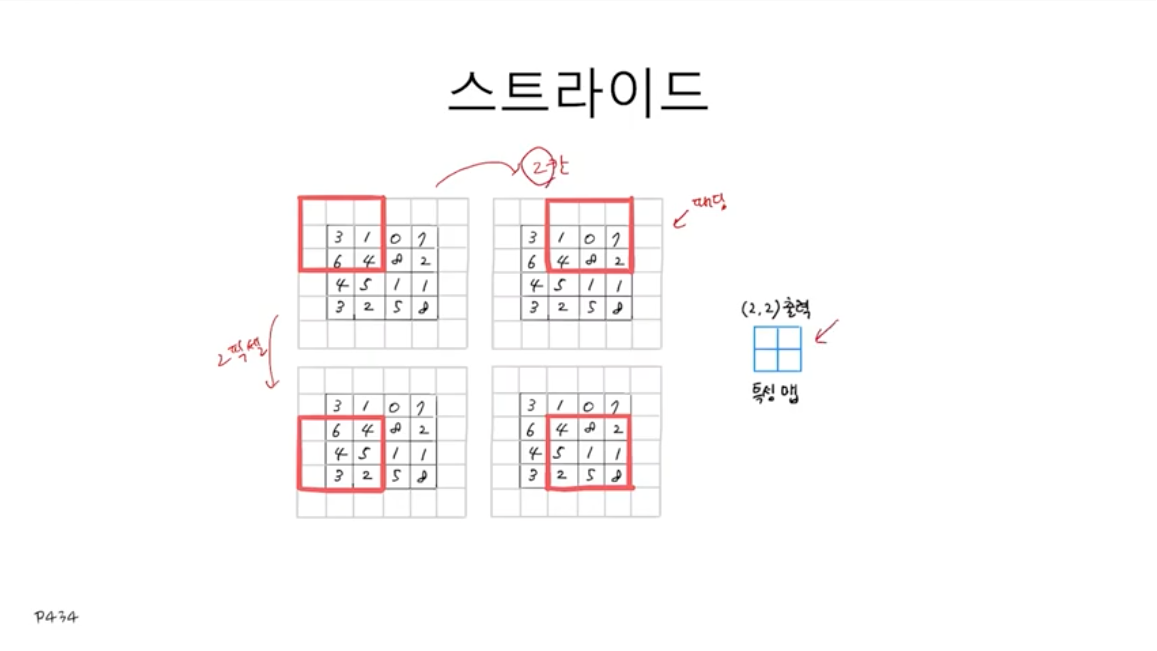

In [22]:
Image('/gdrive/My Drive/Colab Notebooks/ML_Learning17_합성곱신경망_images/08.png')

합성곱 인공신경망에서는 특성맵을 더욱 간소화 하기위해 가중치를 가지고 있지 않은 커널로 특성맵을 간소화 시키기만 하는 연산을 추가적으로 시행하는데 

이를 **풀링**이라고 한다.

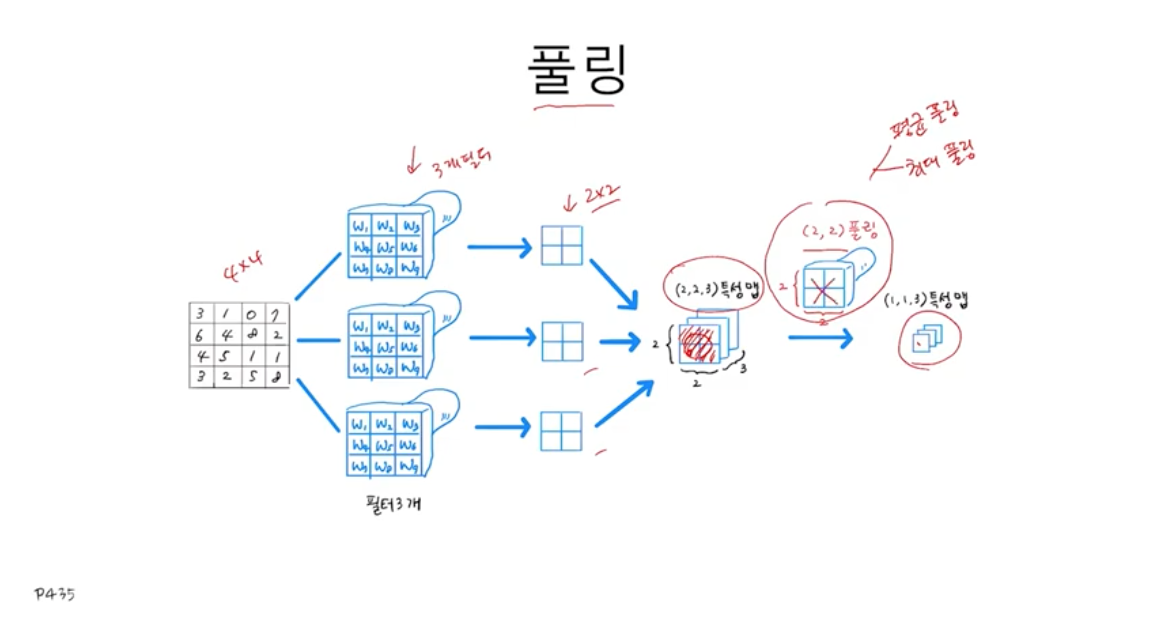

In [24]:
Image('/gdrive/My Drive/Colab Notebooks/ML_Learning17_합성곱신경망_images/09.png')

**최대 풀링**은 커널의 입력중 최댓값만 뽑아서 특성맵을 간소화하는 풀링기법을 말하며, 그림과 같이 슬라이드시 겹치지 않게 스트라이드를 조절한다.

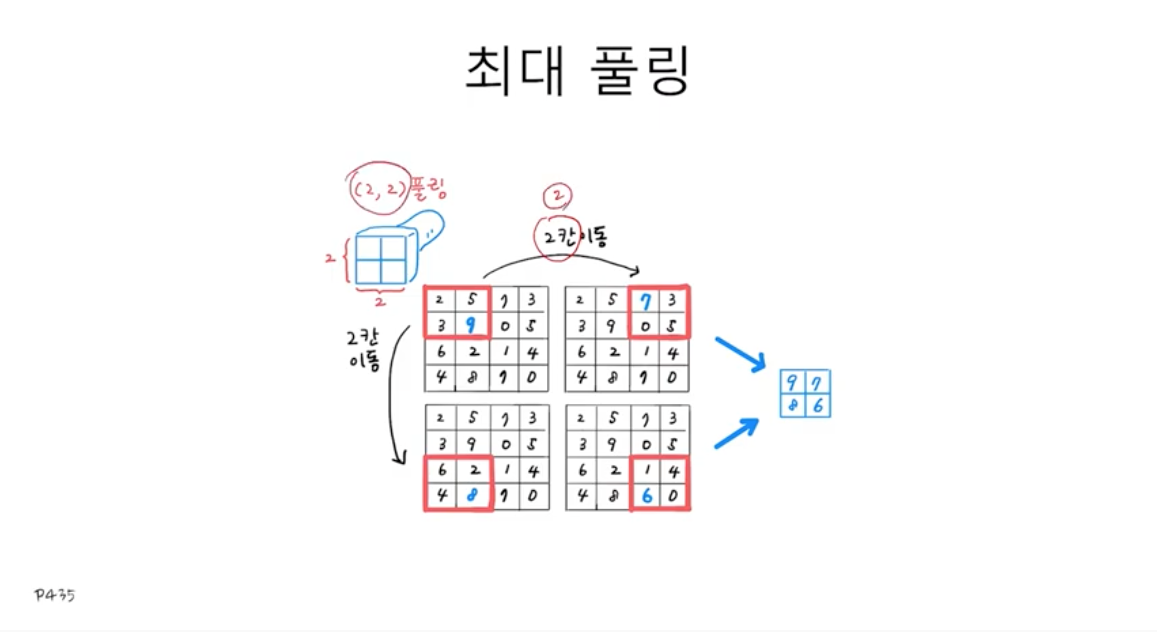

In [26]:
Image('/gdrive/My Drive/Colab Notebooks/ML_Learning17_합성곱신경망_images/10.png')

**합성곱 신경망 전체 이미지**

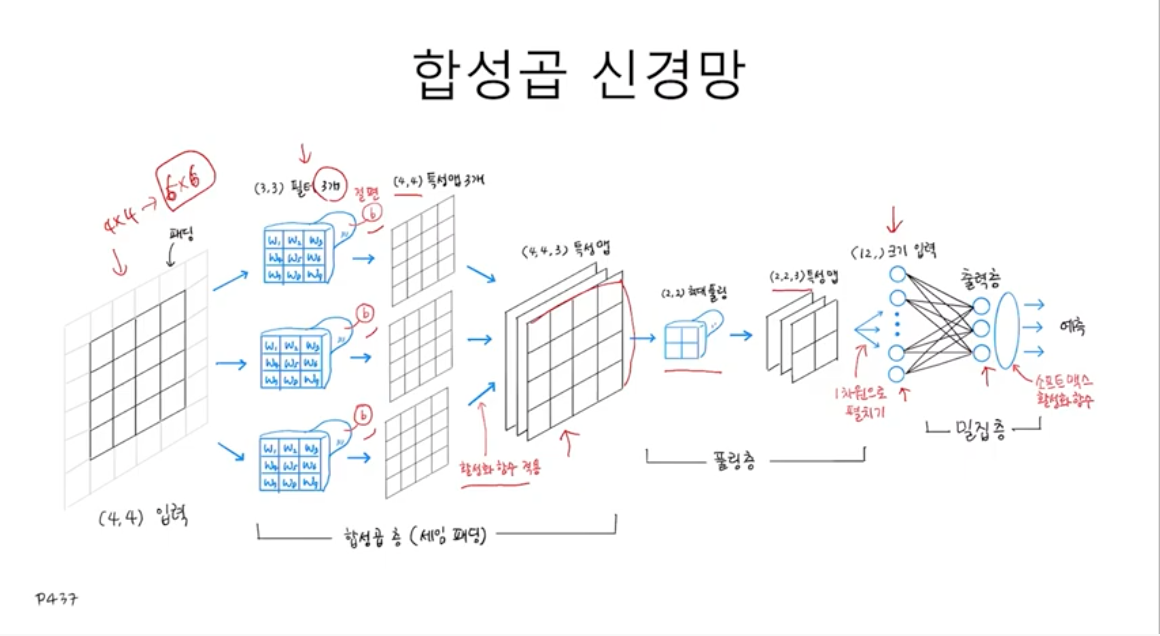

In [27]:
Image('/gdrive/My Drive/Colab Notebooks/ML_Learning17_합성곱신경망_images/11.png')

**3차원 합성곱**

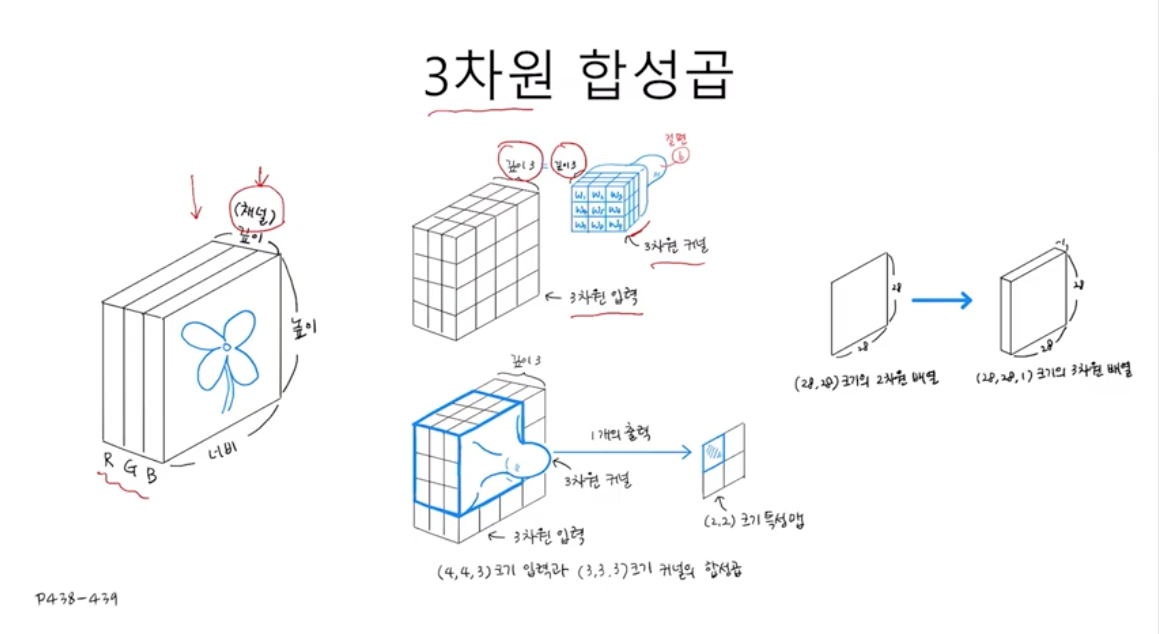

In [29]:
Image('/gdrive/My Drive/Colab Notebooks/ML_Learning17_합성곱신경망_images/12.png')

**여러개의 필터가 있는 3차원 합성곱**

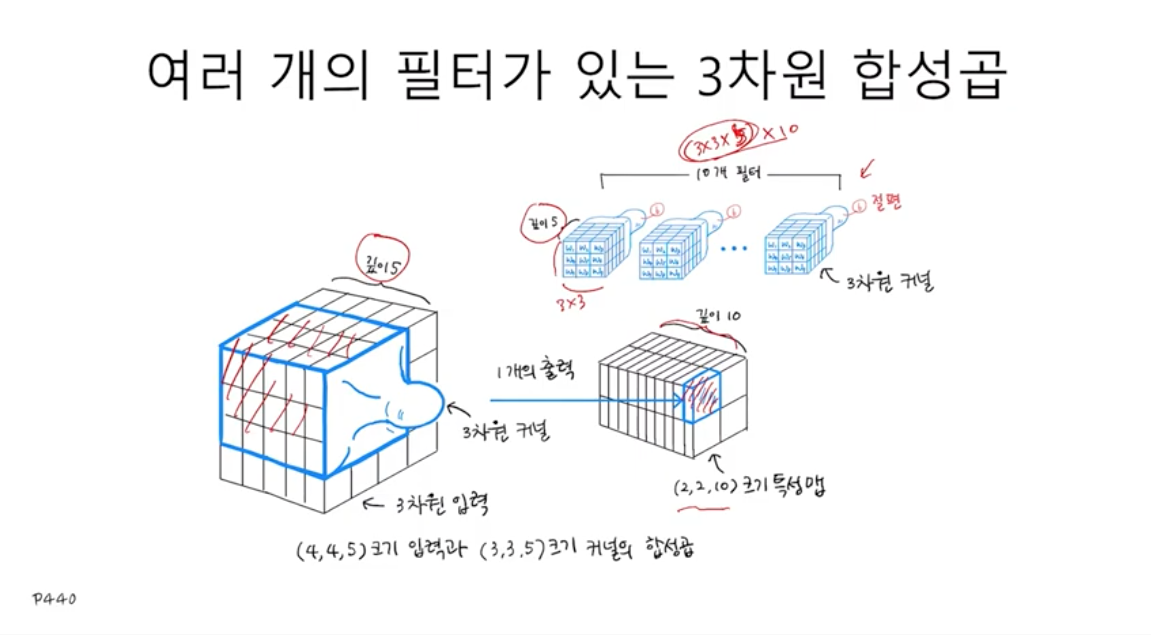

In [30]:
Image('/gdrive/My Drive/Colab Notebooks/ML_Learning17_합성곱신경망_images/13.png')

# **Keras에서의 합성곱**

In [16]:
from tensorflow import keras
#합성곱 인공신경망층은 keras.layers패키지 하위의 Conv2D라는 클래스로 저장되어있다.
#아래의 conv라는 합성곱 인공신경망층은 3X3크기의 커널 10개를 사용하며 활성화함수로는 relu함수를 사용한다.
conv = keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu')

#padding:사용할 패딩 설정
#'same'(세임패딩):입력 배열과 특성맵의 크기가 같도록 패딩
conv = keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu',padding='same')
#'valid'(벨리드패딩):입력배열보다 특성맵의 크기가 작아지도록 패딩
conv = keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu',padding='valid')
#strides:이동할 칸수 설정(기본값:1)
conv = keras.layers.Conv2D(10,kernel_size=(3,3),activation='relu',strides=1)

**풀링층**

In [ ]:
#2차원 최대 풀링은 MaxPool2D(n)(n:nXn크기의 커널)객체를 통해 구현한다.
#strides:커널의 이동칸 수, 따로 지정하지 않으면 커널이 슬라이드시 겹치지 않는 스트라이드로 자동설정된다(권장).
#padding:패딩. 풀링은 특성맵의 크기를 줄이는 것이 목적이기 때문에 valid패딩을 주로 사용한다(기본값:'valid').
pool = keras.layers.MaxPool2D(2,strides=2,padding='valid')